### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [2]:
# importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns

In [5]:
# !pip install seaborn

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [249]:
# read the data
df_4 = pd.read_csv(r'../train_test.csv')

In [250]:
df_4.shape

(132260, 79)

#### Data Exploration of numerical columns

In [115]:
# Selecting numerical columns
numerical_cols = df_4.select_dtypes(include=['number']).columns

# Listing down all numerical columns
print(numerical_cols)
print(len(numerical_cols))

Index(['H_EXCESS_FREIGHT_EUR', 'H_EXTRA_FREIGHT_EUR', 'H_DND_EUR',
       'REFUND_EUR', 'NO_OF_CONTAINERS', 'QUANTITY', 'INV_LINE_TOTAL',
       'INV_LINE_TOTAL_EUR', 'RATE_UNIT_PRICE', 'UNIT_LINE_DEV', 'RLINE_TOTAL',
       'RLINE_TOTAL_EUR', 'L_EXCESS_FREIGHT_EUR', 'L_EXTRA_FREIGHT_EUR',
       'L_DND_EUR', 'SEQNO', 'ORIGINAL_QUANTITY', 'PAYABLE_TO',
       'H_DEVIATION_PERCENTAGE', 'H_EXCESS_UNIT_TOTAL',
       'H_INV_UNIT_CUR_EXCESS_TOTAL', 'H_INVOICE_UNIT_CURRENCY_EXCESS_EUR',
       'H_INV_UNIT_CUR_EXCHANGE_RATE_LOSS',
       'H_INV_CURRENCY_EXCHANGE_RATE_LOSS_EUR', 'CNTR_SIZE',
       'L_EXCESS_UNIT_TOTAL', 'L_INV_UNIT_CUR_EXCESS_TOTAL',
       'L_INVOICE_UNIT_CURRENCY_EXCESS_EUR',
       'L_INV_UNIT_CUR_EXCHANGE_RATE_LOSS',
       'L_INV_CURRENCY_EXCHANGE_RATE_LOSS_EUR'],
      dtype='object')
30


In [116]:
numerical_df = df_4.select_dtypes(include = ['number'])
numerical_df.head()

,H_EXCESS_FREIGHT_EUR,H_EXTRA_FREIGHT_EUR,H_DND_EUR,REFUND_EUR,NO_OF_CONTAINERS,QUANTITY,INV_LINE_TOTAL,INV_LINE_TOTAL_EUR,RATE_UNIT_PRICE,UNIT_LINE_DEV,...,H_INV_UNIT_CUR_EXCESS_TOTAL,H_INVOICE_UNIT_CURRENCY_EXCESS_EUR,H_INV_UNIT_CUR_EXCHANGE_RATE_LOSS,H_INV_CURRENCY_EXCHANGE_RATE_LOSS_EUR,CNTR_SIZE,L_EXCESS_UNIT_TOTAL,L_INV_UNIT_CUR_EXCESS_TOTAL,L_INVOICE_UNIT_CURRENCY_EXCESS_EUR,L_INV_UNIT_CUR_EXCHANGE_RATE_LOSS,L_INV_CURRENCY_EXCHANGE_RATE_LOSS_EUR
0,146.94,0.0,0.0,0,1.0,1.0,216.0,216.0,216,0.0,...,0.00,0.00,19.80,19.80,40.0,0.0,0.00,0.00,19.80,19.80
1,146.94,0.0,0.0,0,1.0,1.0,190.0,190.0,190,0.0,...,0.00,0.00,0.00,0.00,40.0,0.0,0.00,0.00,0.00,0.00
2,146.94,0.0,0.0,0,1.0,1.0,5993.0,5993.0,6377,-384.0,...,-348.81,-348.81,549.27,549.27,40.0,-384.0,-348.81,-348.81,549.27,549.27
3,440.82,0.0,0.0,0,3.0,3.0,648.0,648.0,216,0.0,...,0.00,0.00,59.39,59.39,40.0,0.0,0.00,0.00,59.39,59.39
4,440.82,0.0,0.0,0,3.0,3.0,570.0,570.0,190,0.0,...,0.00,0.00,0.00,0.00,40.0,0.0,0.00,0.00,0.00,0.00


In [117]:
# check for null values in the numerical dataframe
numerical_df.isnull().sum()

H_EXCESS_FREIGHT_EUR                         0
H_EXTRA_FREIGHT_EUR                          0
H_DND_EUR                                    0
REFUND_EUR                                   0
NO_OF_CONTAINERS                            11
QUANTITY                                    11
INV_LINE_TOTAL                               1
INV_LINE_TOTAL_EUR                           0
RATE_UNIT_PRICE                              0
UNIT_LINE_DEV                                0
RLINE_TOTAL                                  0
RLINE_TOTAL_EUR                              0
L_EXCESS_FREIGHT_EUR                         0
L_EXTRA_FREIGHT_EUR                          0
L_DND_EUR                                    0
SEQNO                                        0
ORIGINAL_QUANTITY                           28
PAYABLE_TO                               63450
H_DEVIATION_PERCENTAGE                       0
H_EXCESS_UNIT_TOTAL                          0
H_INV_UNIT_CUR_EXCESS_TOTAL                  0
H_INVOICE_UNI

In [118]:
# drop 'PAYABLE_TO' column from the dataframe since it has only null values
numerical_df = numerical_df.drop('PAYABLE_TO',axis = 1)

In [119]:
# Fill missing numerical values
for col in numerical_df.columns:
    numerical_df[col].fillna(numerical_df[col].median(), inplace=True)

In [120]:
# check if the null values are removed completely
numerical_df.isnull().sum()

H_EXCESS_FREIGHT_EUR                     0
H_EXTRA_FREIGHT_EUR                      0
H_DND_EUR                                0
REFUND_EUR                               0
NO_OF_CONTAINERS                         0
QUANTITY                                 0
INV_LINE_TOTAL                           0
INV_LINE_TOTAL_EUR                       0
RATE_UNIT_PRICE                          0
UNIT_LINE_DEV                            0
RLINE_TOTAL                              0
RLINE_TOTAL_EUR                          0
L_EXCESS_FREIGHT_EUR                     0
L_EXTRA_FREIGHT_EUR                      0
L_DND_EUR                                0
SEQNO                                    0
ORIGINAL_QUANTITY                        0
H_DEVIATION_PERCENTAGE                   0
H_EXCESS_UNIT_TOTAL                      0
H_INV_UNIT_CUR_EXCESS_TOTAL              0
H_INVOICE_UNIT_CURRENCY_EXCESS_EUR       0
H_INV_UNIT_CUR_EXCHANGE_RATE_LOSS        0
H_INV_CURRENCY_EXCHANGE_RATE_LOSS_EUR    0
CNTR_SIZE  

In [37]:
numerical_df.describe(percentiles = [0.1,0.25,0.5,0.75,0.9,0.95]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,max
H_EXCESS_FREIGHT_EUR,63450.0,-1.765511e+03,2.306670e+04,-6.447477e+05,-2300.160,-12.6500,0.00,67.000,1150.400,3385.3500,4.561384e+04
H_EXTRA_FREIGHT_EUR,63450.0,1.363686e+03,3.066623e+03,-2.250000e+03,0.000,0.0000,155.04,1393.490,3757.440,6179.7000,3.846605e+04
H_DND_EUR,63450.0,1.793680e+02,1.565721e+03,-4.527110e+03,0.000,0.0000,0.00,0.000,29.334,882.2800,1.468210e+05
REFUND_EUR,63450.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000,0.0000,0.00,0.000,0.000,0.0000,0.000000e+00
NO_OF_CONTAINERS,63450.0,2.067392e+00,4.183414e+00,-1.000000e+00,1.000,1.0000,1.00,2.000,4.000,6.0000,2.600000e+02
QUANTITY,63450.0,3.104823e+00,5.778088e+01,-1.000000e+00,1.000,1.0000,1.00,2.000,5.000,7.0000,8.593000e+03
INV_LINE_TOTAL,63450.0,5.278717e+05,9.968905e+06,-1.287846e+08,41.081,170.3700,650.00,3220.000,25371.157,149412.7675,9.305295e+08
INV_LINE_TOTAL_EUR,63450.0,9.386208e+02,3.133143e+03,-5.410978e+04,9.360,44.8200,178.15,616.725,2180.080,4463.4805,1.140490e+05
RATE_UNIT_PRICE,63450.0,2.102991e+04,2.898989e+05,-8.460000e+02,0.000,0.0000,0.00,292.000,1600.100,4514.0000,5.750000e+06
UNIT_LINE_DEV,63450.0,6.598624e+04,1.530426e+06,-8.450000e+06,0.000,0.0000,0.00,72.000,416.000,1275.0000,9.467600e+07


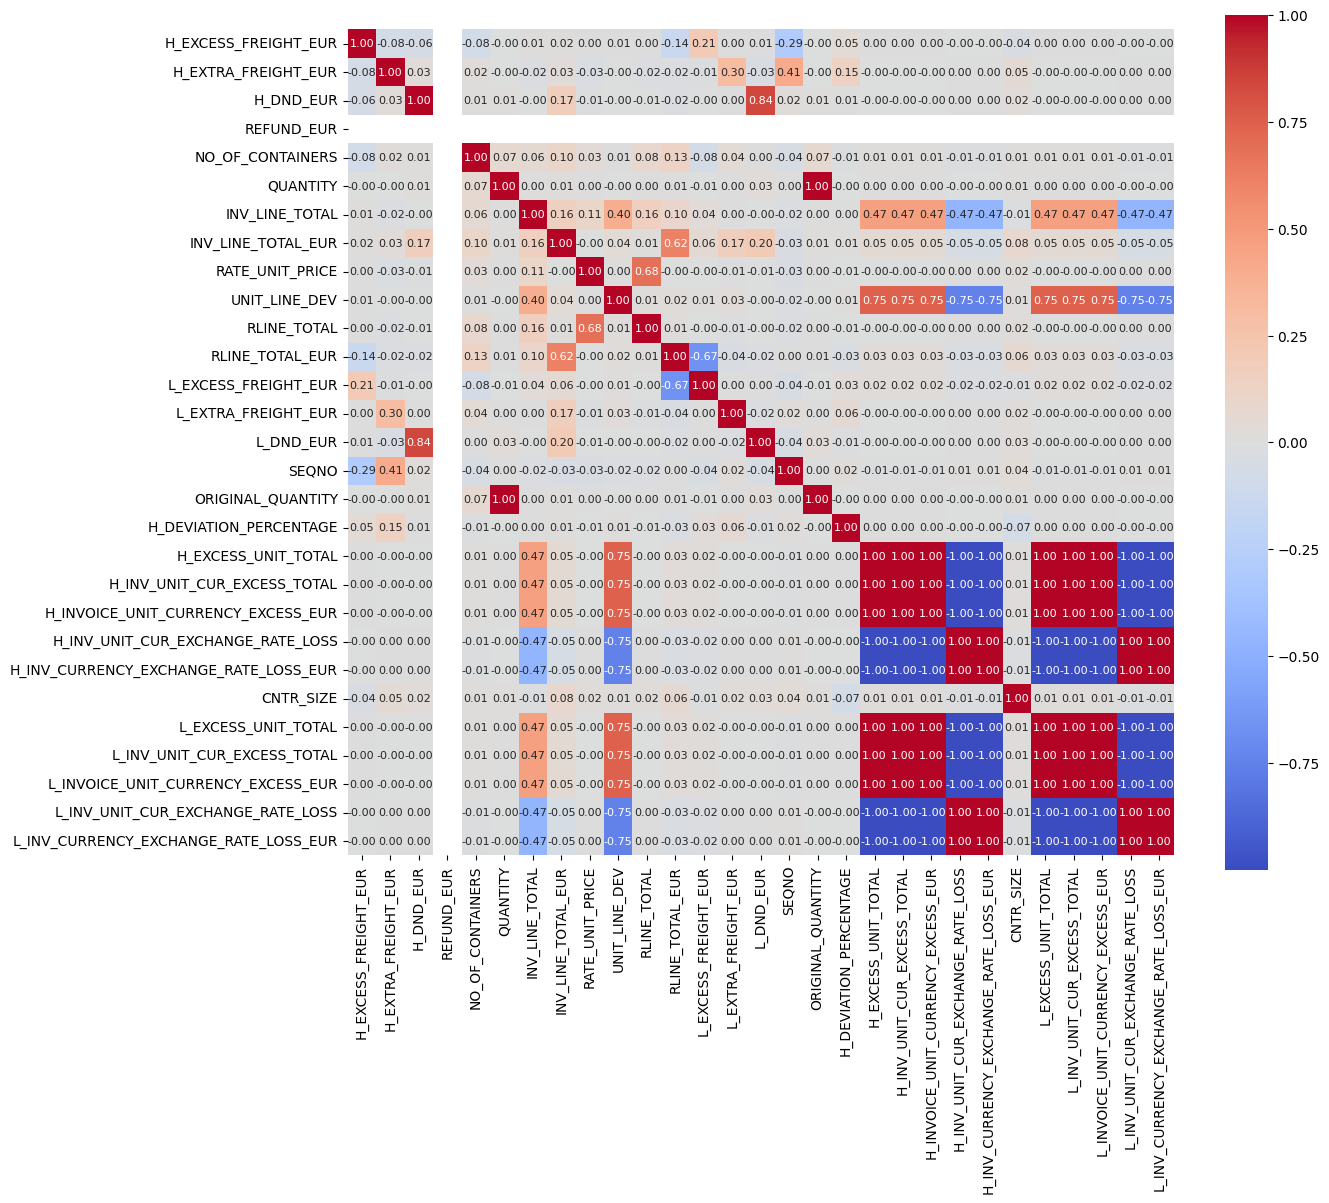

In [42]:
# Correlation matrix
plt.figure(figsize=(14, 12))
sns.heatmap(numerical_df.corr(), annot=True, fmt=".2f", cmap='coolwarm',
            cbar=True, square=True, annot_kws={'size': 8})
# Adjust font size
plt.xticks(fontsize=10)  # Rotate the x labels and adjust font size
plt.yticks(fontsize=10)  # Rotate the y labels and adjust font size

# Optional: Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

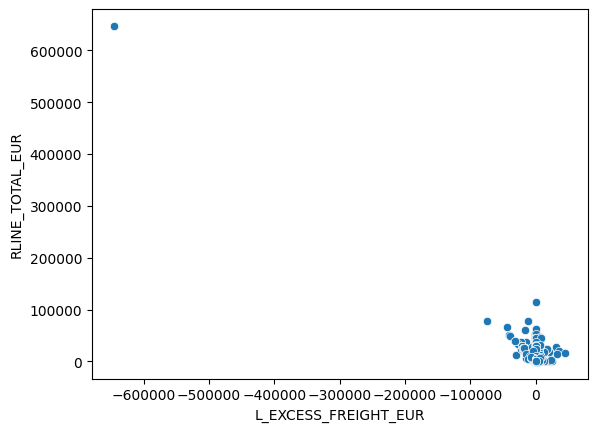

In [44]:
sns.scatterplot(data = numerical_df, x = 'L_EXCESS_FREIGHT_EUR',y ='RLINE_TOTAL_EUR')
plt.show()

In [45]:
# # removing the outliers from 'L_EXCESS_FREIGHT_EUR' and 'RLINE_TOTAL_EUR'
# column_names = ['L_EXCESS_FREIGHT_EUR','RLINE_TOTAL_EUR']
# correlated_df = numerical_df[['L_EXCESS_FREIGHT_EUR','RLINE_TOTAL_EUR']]
                              
# for column in column_names:
#     # Calculate Q1 (25th percentile) and Q3 (75th percentile) of the column
#     Q1 = correlated_df[column].quantile(0.25)
#     Q3 = correlated_df[column].quantile(0.75)
    
#     # Calculate the Interquartile Range (IQR)
#     IQR = Q3 - Q1
    
#     # Define bounds for what is considered an outlier
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     # Filter out outliers and keep only the valid data points
#     correlated_df = correlated_df[(correlated_df[column] >= lower_bound) & (correlated_df[column] <= upper_bound)]

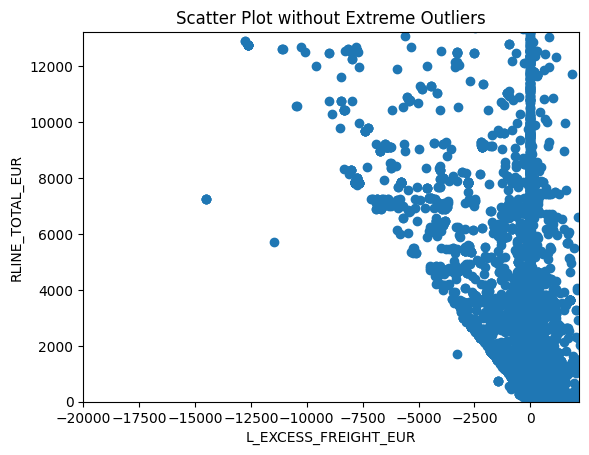

In [52]:
# Scatter plot without the outlier
plt.scatter(numerical_df['L_EXCESS_FREIGHT_EUR'], numerical_df['RLINE_TOTAL_EUR'])

# Set x and y axis limits to zoom in on the majority of the data
plt.xlim(left=-20000, right=df['L_EXCESS_FREIGHT_EUR'].quantile(0.99))  # Adjust the 0.99 quantile as needed
plt.ylim(bottom=df['RLINE_TOTAL_EUR'].quantile(0.01), top=df['RLINE_TOTAL_EUR'].quantile(0.99))  # Adjust the quantiles as needed

# Add labels and title if needed
plt.xlabel('L_EXCESS_FREIGHT_EUR')
plt.ylabel('RLINE_TOTAL_EUR')
plt.title('Scatter Plot without Extreme Outliers')

# Show the plot
plt.show()

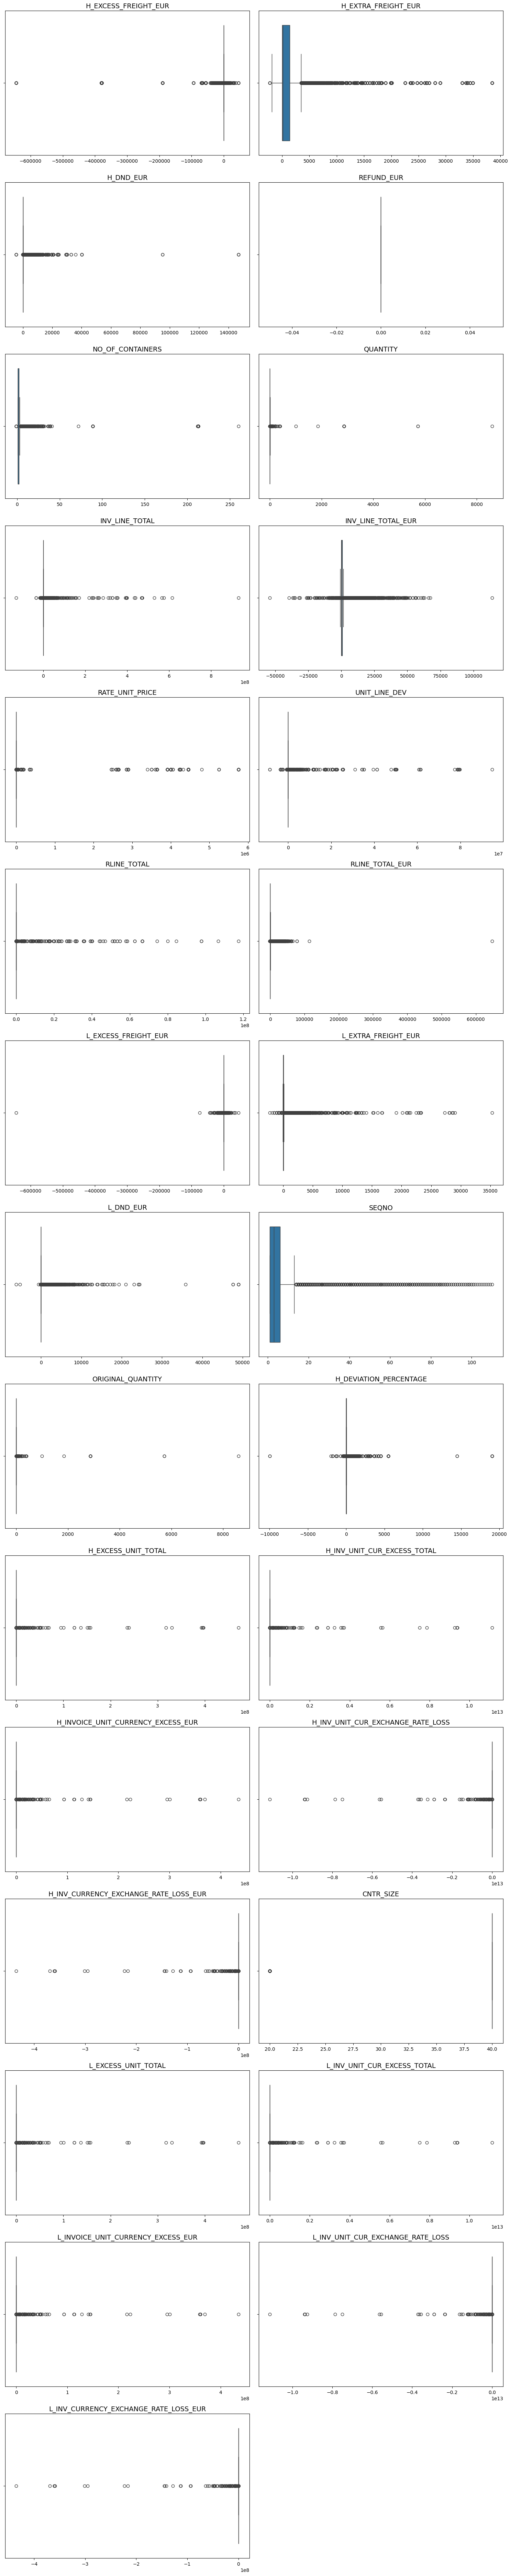

In [53]:
# Determine the number of rows required in the subplot grid
num_cols = numerical_df.shape[1]
num_rows = (num_cols + 1) // 2  # Adjust the denominator to control how many plots per row you want

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Flatten the array of axes, so it's easier to iterate over
axes = axes.flatten()

# Create a box plot for each numerical column
for i, col in enumerate(numerical_df.columns):
    sns.boxplot(x=numerical_df[col], ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel('')

# If the number of numerical columns is odd, delete the last subplot (which is empty)
if num_cols % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

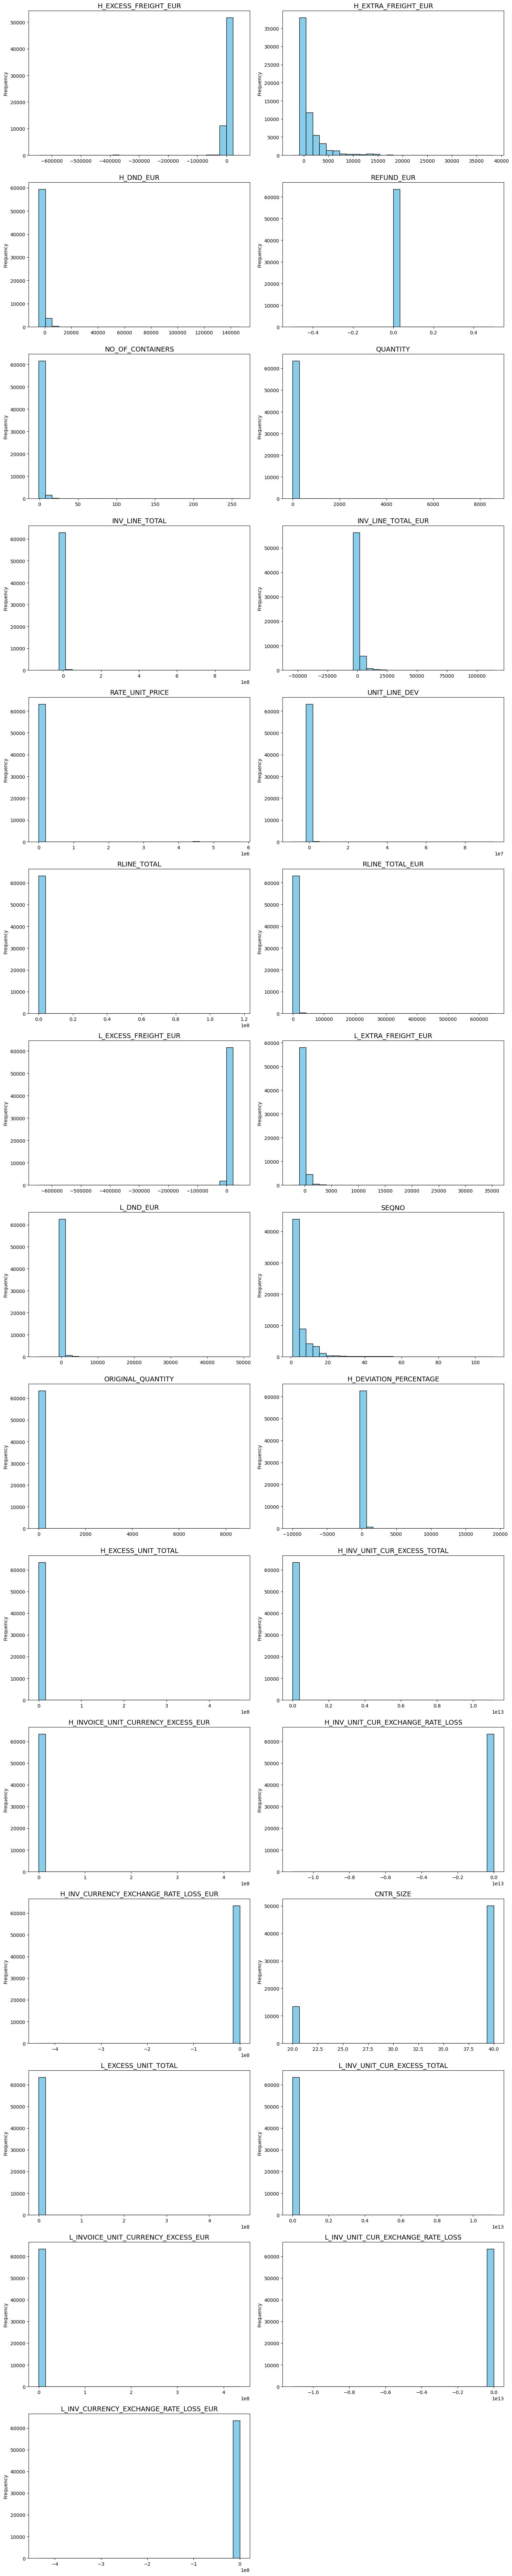

In [54]:
# Determine the number of rows required in the subplot grid
num_cols = numerical_df.shape[1]
num_rows = (num_cols + 1) // 2  # Adjust the denominator to control how many plots per row you want

# Create a figure and a grid of subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Flatten the array of axes, so it's easier to iterate over
axes = axes.flatten()

# Create a histogram for each numerical column
for i, col in enumerate(numerical_df.columns):
    axes[i].hist(numerical_df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    axes[i].set_title(col, fontsize=14)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Frequency')

# If the number of numerical columns is odd, delete the last subplot (which is empty)
if num_cols % 2 != 0:
    fig.delaxes(axes[-1])

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

In [59]:
numerical_df.columns

Index(['H_EXCESS_FREIGHT_EUR', 'H_EXTRA_FREIGHT_EUR', 'H_DND_EUR',
       'REFUND_EUR', 'NO_OF_CONTAINERS', 'QUANTITY', 'INV_LINE_TOTAL',
       'INV_LINE_TOTAL_EUR', 'RATE_UNIT_PRICE', 'UNIT_LINE_DEV', 'RLINE_TOTAL',
       'RLINE_TOTAL_EUR', 'L_EXCESS_FREIGHT_EUR', 'L_EXTRA_FREIGHT_EUR',
       'L_DND_EUR', 'SEQNO', 'ORIGINAL_QUANTITY', 'H_DEVIATION_PERCENTAGE',
       'H_EXCESS_UNIT_TOTAL', 'H_INV_UNIT_CUR_EXCESS_TOTAL',
       'H_INVOICE_UNIT_CURRENCY_EXCESS_EUR',
       'H_INV_UNIT_CUR_EXCHANGE_RATE_LOSS',
       'H_INV_CURRENCY_EXCHANGE_RATE_LOSS_EUR', 'CNTR_SIZE',
       'L_EXCESS_UNIT_TOTAL', 'L_INV_UNIT_CUR_EXCESS_TOTAL',
       'L_INVOICE_UNIT_CURRENCY_EXCESS_EUR',
       'L_INV_UNIT_CUR_EXCHANGE_RATE_LOSS',
       'L_INV_CURRENCY_EXCHANGE_RATE_LOSS_EUR'],
      dtype='object')

In [121]:
# selection of numerical columns
numerical_df = numerical_df[['H_EXCESS_FREIGHT_EUR','REFUND_EUR','NO_OF_CONTAINERS','QUANTITY','INV_LINE_TOTAL','INV_LINE_TOTAL_EUR',
                             'RATE_UNIT_PRICE','RLINE_TOTAL','RLINE_TOTAL_EUR','L_EXCESS_FREIGHT_EUR']]

#### Data Exploration of categorical columns

In [122]:
categorical_df = df_4.select_dtypes(include = ['object'])

In [56]:
categorical_df.head()

,P_INV_START_DATE,P_INV_END_DATE,INVOICE_ID,INV,LANE_ID,CURRENCY,LOADING_DATE,INVOICE_DATE,BL_NUMBER,CARRIER,...,FOURTY_FEET_RATE_RECORD_ID,UPDATE_TIME,DOMAIN_NAME,CNTR_TYPE,ASSIGNED_USER,INV_COMMENTS,INV_FILE_NAME,INV_CATEGORY,INV_REASON_CODE,L_INV_LINE_COMMENTS
0,1/5/2023,31-08-2023,HLCU-BO2230323032-1001348,1001348,COBUN-CUMAR-DRY,EUR,5/4/2023,5/5/2023,BO2230323032,HLCU,...,RR_HLCU_COBUN-CUMAR-DRY_MINI_141122,10/27/2023,UGOF,DRY,NaN,NaN,NaN,NaN,NaN,NaN
1,1/5/2023,31-08-2023,HLCU-BO2230323032-1001348,1001348,COBUN-CUMAR-DRY,EUR,5/4/2023,5/5/2023,BO2230323032,HLCU,...,RR_HLCU_COBUN-CUMAR-DRY_MINI_141122,10/27/2023,UGOF,DRY,NaN,NaN,NaN,NaN,NaN,NaN
2,1/5/2023,31-08-2023,HLCU-BO2230323032-1001348,1001348,COBUN-CUMAR-DRY,EUR,5/4/2023,5/5/2023,BO2230323032,HLCU,...,RR_HLCU_COBUN-CUMAR-DRY_MINI_141122,10/27/2023,UGOF,DRY,NaN,NaN,NaN,NaN,NaN,NaN
3,1/5/2023,31-08-2023,HLCU-BO2230323065-1001349,1001349,COBUN-CUMAR-DRY,EUR,5/4/2023,5/5/2023,BO2230323065,HLCU,...,RR_HLCU_COBUN-CUMAR-DRY_MINI_141122,11/15/2023,UGOF,DRY,NaN,NaN,NaN,NaN,NaN,NaN
4,1/5/2023,31-08-2023,HLCU-BO2230323065-1001349,1001349,COBUN-CUMAR-DRY,EUR,5/4/2023,5/5/2023,BO2230323065,HLCU,...,RR_HLCU_COBUN-CUMAR-DRY_MINI_141122,11/15/2023,UGOF,DRY,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
categorical_df.describe().T

,count,unique,top,freq
P_INV_START_DATE,63450,1,1/5/2023,63450
P_INV_END_DATE,63450,1,31-08-2023,63450
INVOICE_ID,63450,18479,MAEU-226596519-MT22357779,110
INV,63450,18471,MT22357779,110
LANE_ID,63450,1448,INNSA-ZADUR-DRY,2121
CURRENCY,63450,39,USD,17783
LOADING_DATE,63450,568,6/30/2023,610
INVOICE_DATE,63450,380,2/20/2023,1007
BL_NUMBER,63450,10707,223875210,151
CARRIER,63450,25,MAEU,21462


In [124]:
# selection of categorical columns
categorical_df = categorical_df[['INVOICE_ID','LANE_ID','CURRENCY','CARRIER','POL','POD','AMOUNT_DUE','AUDIT_STATUS','INVOICE_TYPE','RATETYPE',
                                 'CALCTYPE','ALTCARRIER','CODE','INV_UNIT_PRICE','ILINE_CURR','ALTLANE_FLAG','CARRIER_NAME','INVOICE_SOURCE']]

In [6]:
# taking the final dataframe
df_for_modeling = df_4[['H_EXCESS_FREIGHT_EUR','REFUND_EUR','NO_OF_CONTAINERS','QUANTITY','INV_LINE_TOTAL','INV_LINE_TOTAL_EUR',
                             'RATE_UNIT_PRICE','RLINE_TOTAL','RLINE_TOTAL_EUR','L_EXCESS_FREIGHT_EUR','INVOICE_ID','LANE_ID','CURRENCY','CARRIER','POL','POD','AMOUNT_DUE','AUDIT_STATUS','INVOICE_TYPE','RATETYPE',
                               'CALCTYPE','ALTCARRIER','CODE','INV_UNIT_PRICE','ILINE_CURR','ALTLANE_FLAG','CARRIER_NAME','INVOICE_SOURCE','H_TOTAL_DEVIATION']]

NameError: name 'df_4' is not defined

In [252]:
df_for_modeling.isnull().sum()

H_EXCESS_FREIGHT_EUR         0
REFUND_EUR                   0
NO_OF_CONTAINERS          2084
QUANTITY                    24
INV_LINE_TOTAL               0
INV_LINE_TOTAL_EUR           0
RATE_UNIT_PRICE              0
RLINE_TOTAL                  0
RLINE_TOTAL_EUR              0
L_EXCESS_FREIGHT_EUR         0
INVOICE_ID                   1
LANE_ID                     21
CURRENCY                     0
CARRIER                      0
POL                          0
POD                          0
AMOUNT_DUE                   0
AUDIT_STATUS                29
INVOICE_TYPE                21
RATETYPE                    21
CALCTYPE                    21
ALTCARRIER              108938
CODE                         0
INV_UNIT_PRICE           32941
ILINE_CURR                   0
ALTLANE_FLAG                 0
CARRIER_NAME                 0
INVOICE_SOURCE              64
H_TOTAL_DEVIATION            0
dtype: int64

In [253]:
# remove 'ALTCARRIER','INV_UNIT_PRICE' since there are many null values.
df_for_modeling.drop(columns = ['ALTCARRIER','INV_UNIT_PRICE'], inplace = True)

In [254]:
# Impute the null values in the numerical column with median since the data is skewed
# List of columns you want to fill with the median
columns_to_fill = ['NO_OF_CONTAINERS', 'QUANTITY']

# Loop through the list and fill each column's NaN values with its median
for column in columns_to_fill:
    df_for_modeling[column].fillna(df_for_modeling[column].median(), inplace=True)

In [255]:
# Extract numeric values from strings using a regular expression
df_for_modeling['amount_numeric'] = df_for_modeling['AMOUNT_DUE'].str.extract(r'(\d+\.\d+)').astype(float)

In [256]:
df_for_modeling['H_TOTAL_DEVIATION'] = df_for_modeling['H_TOTAL_DEVIATION'].str.extract(r'([-]?\d+\.\d+)').astype(float)

In [155]:
df_for_modeling['amount_numeric'].describe()

count     61176.000000
mean       7114.162675
std       13686.631305
min           1.020000
25%         995.760000
50%        2711.650000
75%        6274.320000
max      206501.950000
Name: amount_numeric, dtype: float64

In [156]:
df_for_modeling['H_TOTAL_DEVIATION'].describe()

count     43996.00000
mean      -1401.00239
std       27618.70635
min     -642630.83000
25%        -202.58750
50%         115.51000
75%        1288.61000
max       45682.43000
Name: H_TOTAL_DEVIATION, dtype: float64

In [144]:
df_for_modeling.dtypes

H_EXCESS_FREIGHT_EUR    float64
REFUND_EUR                int64
NO_OF_CONTAINERS        float64
QUANTITY                float64
INV_LINE_TOTAL          float64
INV_LINE_TOTAL_EUR      float64
RATE_UNIT_PRICE           int64
RLINE_TOTAL               int64
RLINE_TOTAL_EUR         float64
L_EXCESS_FREIGHT_EUR    float64
CURRENCY                 object
CARRIER                  object
POL                      object
POD                      object
AMOUNT_DUE               object
AUDIT_STATUS             object
INVOICE_TYPE             object
RATETYPE                 object
CALCTYPE                 object
CODE                     object
ILINE_CURR               object
ALTLANE_FLAG             object
CARRIER_NAME             object
INVOICE_SOURCE           object
H_TOTAL_DEVIATION        object
amount_numeric          float64
dtype: object

In [177]:
df_for_modeling['INVOICE_ID'].head()

0    HLCU-BO2230323032-1001348
1    HLCU-BO2230323032-1001348
2    HLCU-BO2230323032-1001348
3    HLCU-BO2230323065-1001349
4    HLCU-BO2230323065-1001349
Name: INVOICE_ID, dtype: object

In [131]:
# check the value counts of the code
df_for_modeling['CODE'].value_counts()

CODE
OTHERS      15319
OTHERS01    10860
OCF_40       7995
BAF_40       6993
DTHC_40      5160
OTHC_40      3507
OCF_20       1643
IMDEM_40     1553
BAF_20       1445
IMDET_40     1426
ISTRG        1172
DOC          1149
DTHC_20      1097
OTHC_20       707
EXDET_40      680
IMDEM         594
ADMF          348
DGS_40        345
IMDET         293
IMDET_20      262
EXDEM_40      204
EXDET_20      171
ESTRG         166
IMDEM_20      128
DGS_20        123
AMD            40
EXDEM_20       34
CUST           20
TOTAL          10
EXDEM           5
TAX             1
Name: count, dtype: int64

In [5]:
# consider only these contract charges OCF, BAF, DTHC, OTHC for both 20ft & 40ft
df_for_modeling = df_for_modeling[(df_for_modeling['CODE'] == 'OCF_40')|(df_for_modeling['CODE'] == 'OCF_20') | (df_for_modeling['CODE'] == 'BAF_40') |(df_for_modeling['CODE'] == 'BAF_20') | (df_for_modeling['CODE'] == 'DTHC_40') |(df_for_modeling['CODE'] == 'DTHC_20') | (df_for_modeling['CODE'] == 'OTHC_40') | (df_for_modeling['CODE'] == 'OTHC_20')]

NameError: name 'df_for_modeling' is not defined

In [258]:
df_for_modeling.drop(columns = ['LANE_ID','AMOUNT_DUE'],inplace = True)

In [259]:
df_for_modeling.drop_duplicates(subset = 'INVOICE_ID', keep = 'first',inplace = True)

In [260]:
# drop the invoice id column since it might lead to overfitting of the model
df_for_modeling.drop(columns = ['INVOICE_ID'], inplace = True)

compare to the original dataframe we removed almost 60% of the data with the help of relevant codes

In [261]:
# deriving the target column from 'H_EXCESS_FREIGHT_EUR', and 'L_EXCESS_FREIGHT_EUR' based on their values
conditions = [
    (df_for_modeling['H_TOTAL_DEVIATION'] < 0),  # Both negative
    (df_for_modeling['H_TOTAL_DEVIATION'] == 0),
    (df_for_modeling['H_TOTAL_DEVIATION'] > 0)
]
choices = ['neg', 'ok', 'pos']

# Create the new column based on the conditions and choices
df_for_modeling['invoice_status'] = np.select(conditions, choices, default='ok')

In [262]:
df_for_modeling['invoice_status'].value_counts()

invoice_status
pos    14776
neg    14140
ok      8419
Name: count, dtype: int64

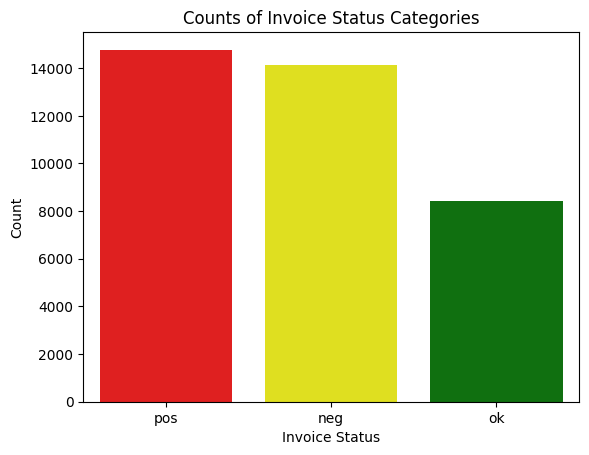

In [263]:
# Calculate the counts for each category
status_counts = df_for_modeling['invoice_status'].value_counts()

# Define a color for each category
palette = {"pos": "red", "neg": "yellow", "ok": "green"}

# Create a bar plot
sns.barplot(x=status_counts.index, y=status_counts.values, palette=palette)

# Set the labels and title
plt.xlabel('Invoice Status')
plt.ylabel('Count')
plt.title('Counts of Invoice Status Categories')

# Display the plot
plt.show()

In [264]:
# Define a mapping dictionary
status_mapping = {'ok': 0, 'neg': 1, 'pos': 2}

# Replace the categorical values with the defined mapping
df_for_modeling['invoice_status_code'] = df_for_modeling['invoice_status'].replace(status_mapping)

In [265]:
df_for_modeling.drop(columns = ['invoice_status'], inplace = True)

In [268]:
df_for_modeling.dtypes

H_EXCESS_FREIGHT_EUR    float64
REFUND_EUR              float64
NO_OF_CONTAINERS        float64
QUANTITY                float64
INV_LINE_TOTAL          float64
INV_LINE_TOTAL_EUR      float64
RATE_UNIT_PRICE         float64
RLINE_TOTAL             float64
RLINE_TOTAL_EUR         float64
L_EXCESS_FREIGHT_EUR    float64
CURRENCY                 object
CARRIER                  object
POL                      object
POD                      object
AUDIT_STATUS             object
INVOICE_TYPE             object
RATETYPE                 object
CALCTYPE                 object
CODE                     object
ILINE_CURR               object
ALTLANE_FLAG             object
CARRIER_NAME             object
INVOICE_SOURCE           object
H_TOTAL_DEVIATION       float64
amount_numeric          float64
invoice_status_code       int64
dtype: object

In [266]:
# Identify categorical variables. You might want to exclude certain columns that are not useful for modeling.
categorical_cols = df_for_modeling.select_dtypes(include=['object']).columns

# Apply One-Hot Encoding to these columns
df_ohe = pd.get_dummies(df_for_modeling, columns=categorical_cols)

In [267]:
df_ohe.shape

(37335, 763)

In [269]:
df_ohe.drop(columns = ['H_EXCESS_FREIGHT_EUR','L_EXCESS_FREIGHT_EUR','H_TOTAL_DEVIATION'],inplace = True)

In [4]:
df_ohe['invoice_status_code'].value_counts()

NameError: name 'df_ohe' is not defined

In [271]:
df_ohe.dropna(inplace = True)

In [272]:
df_ohe.shape

(35225, 760)

In [273]:
df_ohe.to_csv(r'train.csv')

In [274]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Assuming df_ohe is your DataFrame after applying One-Hot Encoding
X = df_ohe.drop('invoice_status_code', axis=1)  # Replace 'target_variable' with the name of your target column
y = df_ohe['invoice_status_code']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [275]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Initialize the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=60, random_state=42)  # n_estimators is the number of trees

# Train the classifier
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=60, random_state=42)

In [276]:
# Make predictions with the test data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.9232


In [241]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [277]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate Recall
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')  # Use 'binary' for binary classification

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Precision: 0.9238
Recall: 0.9232
F1 Score: 0.9232


In [279]:
from joblib import dump
dump(clf, 'head_dev_classifier.joblib')

['head_dev_classifier.joblib']